<a href="https://colab.research.google.com/github/thisant/Sistema_Recomendacao_Grafos/blob/main/Sistema_de_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import da biblioteca

import pandas as pd
idx = pd.IndexSlice

In [44]:
# Preparando o Dataset

links = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/links.csv",  index_col=['movieId'])
movies = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/movies.csv", sep=",", index_col=['movieId'])
ratings = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/ratings.csv", index_col=['userId','movieId'])
tags = pd.read_csv("http://www.data2learning.com/repo/datasets/movielens/tags.csv", index_col=['userId','movieId'])

In [45]:
print("Total de usuários na base: %i" % len(list(set([x[0] for x in ratings.index.values]))))
print("Total de filmes: %i" % (movies.shape[0]))
print("Total de avaliações: %i" % (ratings.shape[0]))

Total de usuários na base: 610
Total de filmes: 9742
Total de avaliações: 100836


In [46]:
def get_movies_by_user(id_user, rating_cut=0, list_=False):
      
    return_dict = {}
    dict_ = ratings.loc[idx[id_user, :], 'rating'].T.to_dict()
    
    for d in dict_:
        if rating_cut != 0:
            if dict_[d] >= rating_cut:
                return_dict[d[1]] = dict_[d]
        else:
            return_dict[d[1]] = dict_[d]
    
    if list_:
        return list(return_dict.keys())

    return return_dict

def get_users_by_movie(id_movie, rating_cut=0, list_=False):
    
    
    return_dict = {}

    try:
      dict_ = ratings.loc[idx[:, id_movie],'rating'].T.to_dict()

      for d in dict_:
        if rating_cut != 0:
            if dict_[d] >= rating_cut:
                return_dict[d[0]] = dict_[d]
        else:
            return_dict[d[0]] = dict_[d]
    
    except KeyError as e:
      pass
    
    
        
    if list_:
        return list(return_dict.keys())
    
    return return_dict


def get_rating_by_user_movie(id_user, id_movie):
    
    rating = 0.0;
    
    try:
        rating = ratings.loc[idx[id_user, id_movie], 'rating']
    except KeyError as e:
        rating = 0.0

    return rating

def get_movie_title(id_movie):
    
    info = movies.loc[idx[id_movie], :]
    return info['title']


def get_all_users(ratings_):  
    
    return list(set([x[0] for x in ratings_.index.values]))

In [47]:
all_users = get_all_users(ratings)

In [48]:
all_users = get_all_users(ratings)

movies_user = {}

for user in all_users:
    movies_user[user] = get_movies_by_user(user, rating_cut=5, list_=True)



In [49]:
user_movies = {}

for movie in list(movies.index):
  user_movies[movie] = get_users_by_movie(movie, rating_cut=5, list_=True)

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for user in all_users:
  node_name = "User" + str(user)
  G.add_node(node_name)

for user in all_users:
  my_movies = movies_user[user]


  # Lista de todos os usuários que avaliaram os filmes assistidos por A
  all_users = []

  for movie in my_movies:
      all_users = all_users + user_movies[movie]

  all_users = list(set(all_users))
  
  for neigh in all_users:
    user_a = "User" + str(user)
    user_b = "User" + str(neigh)
    G.add_edge(user_a,user_b)

In [51]:
print("Total de vértices: %i" % G.number_of_nodes())
print("Total de arestas: %i" % G.number_of_edges())

Total de vértices: 610
Total de arestas: 62369


In [52]:
all_adjacentes = list(G.adj['User3'])
print("Adjacentes ao usuário 3: %s" % all_adjacentes)

Adjacentes ao usuário 3: ['User1', 'User610', 'User3', 'User452', 'User303', 'User532', 'User599', 'User312', 'User313', 'User603', 'User91', 'User380', 'User382', 'User95']


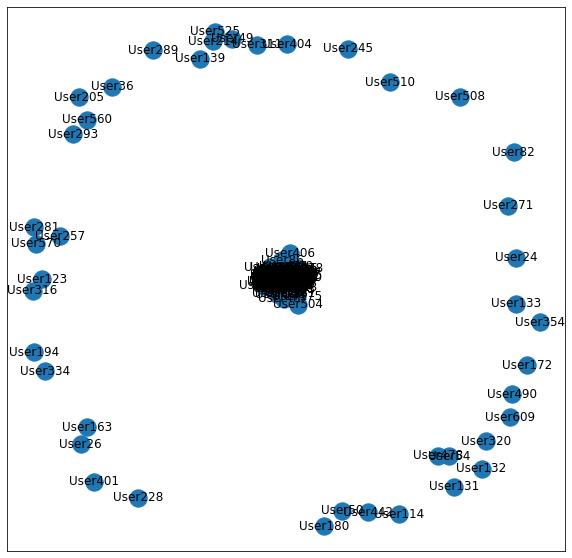

In [53]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True)
plt.show()

In [108]:
#Lista de recomendação
def recomendacao(user, G):
  
  dicionario = {}
  for i in G.neighbors(user, G):
    for a in G.neighbors(i):
      if index== user and G:
        continue
      if G.nodes[a]['label']=="Usuário","Filmes":
        similar = similar_dicionario.get(a)
        if similar==None:
          similar_dicionario.update({a : [i]})
        else:
          similar.append(i)
          similar_dicionario.update({a : similar})
  filme=[]
  aresta=[]
  for key, values in similar_dicionario.items():
    w=0.0
    for i in values:
      w=w+1/math.log(G.degree(i))
      filme.append(key) 
      aresta.append(d)
    
  lista = pd.Series(data=np.array(aresta),index=filme)
  lista.sort_values(ascending=True, inplace=True)        
  return lista;